# Introduction to Machine Learning
## Working with Scikit-Learn
In this Scrapbook, we will work through some basic procedures when working on machine learning projects. We will:
Defining a Problem
1. Prepare the Data
2. Apply & evaluate ML Algorithm
3. Improve our Results
4. Present the Results

Now lets import the libraries and data.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as ml

#import data containing NHCS Death rates and Life Expectancy in the US
ld_sheet=pd.read_csv('death_life.csv')
ld_sheet

,Year,Race,Sex,ALE,DR
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3
5,2010,All Races,Both Sexes,78.7,747.0
6,2009,All Races,Both Sexes,78.5,749.6
7,2008,All Races,Both Sexes,78.2,774.9
8,2007,All Races,Both Sexes,78.1,775.3
9,2006,All Races,Both Sexes,77.8,791.8


## 1. Prepare the Data
We have two columns inour data that contain categorical data (Race,Sex) and we would need to preprocess them into forms that would enable our model get the best perform. To do this, we need to cover them to values. However we need to keep it in mind that giving them values in range (0-9) would assign magnitude (and therefore incorrect degrees of importance) to the caterogical data. This would make our model perform poorly, so we would avoid use the "get_dummies()' method from Pandas which would solve this problem by using (0,1) to represent the data.

First we will query our extracted dataframe to focus on data relating to Races(Black,White) & Gender(Male,Female) only.

In [8]:
#query data
ld_sheet=ld_sheet.query("(Race=='Black' | Race=='White') & (Sex=='Male' | Sex=='Female')")
print(ld_sheet)
#apply get_dummies function
sheet_=pd.get_dummies(ld_sheet,columns=['Race','Sex'])
print(sheet_)

      Year   Race     Sex   ALE      DR
464   2015  Black  Female   NaN   710.8
465   2014  Black  Female  78.5   713.3
466   2013  Black  Female  78.4   720.6
467   2012  Black  Female  78.4   723.9
468   2011  Black  Female  78.2   739.8
469   2010  Black  Female  78.0   752.5
470   2009  Black  Female  77.7   763.3
471   2008  Black  Female  77.3   792.0
472   2007  Black  Female  77.0   808.1
473   2006  Black  Female  76.7   828.4
474   2005  Black  Female  76.2   862.7
475   2004  Black  Female  76.1   869.8
476   2003  Black  Female  75.7   898.3
477   2002  Black  Female  75.4   913.5
478   2001  Black  Female  75.3   917.9
479   2000  Black  Female  75.1   927.6
480   1999  Black  Female  74.7   933.6
481   1998  Black  Female  74.8   921.0
482   1997  Black  Female  74.7   921.6
483   1996  Black  Female  74.2   939.6
484   1995  Black  Female  73.9   955.7
485   1994  Black  Female  73.9   954.0
486   1993  Black  Female  73.7   968.6
487   1992  Black  Female  73.9   941.4


In [10]:
#Handle Missing Data
ld_sheet=sheet_.fillna(0)
ld_sheet

,Year,ALE,DR,Race_Black,Race_White,Sex_Female,Sex_Male
464,2015,0.0,710.8,1,0,1,0
465,2014,78.5,713.3,1,0,1,0
466,2013,78.4,720.6,1,0,1,0
467,2012,78.4,723.9,1,0,1,0
468,2011,78.2,739.8,1,0,1,0
469,2010,78.0,752.5,1,0,1,0
470,2009,77.7,763.3,1,0,1,0
471,2008,77.3,792.0,1,0,1,0
472,2007,77.0,808.1,1,0,1,0
473,2006,76.7,828.4,1,0,1,0


Group Data into features & Label so we train and develop a Model. Our objective is to be able to predict the Life Expectancy of  Gender & Race for a any given year.

We will also go ahead to segment the data into Training,Test and Validation Data.

In [11]:
#train dataset
train_dataset = ld_sheet.sample(frac=0.6,random_state=0) #60% of the dataset
remaining_dataset = ld_sheet.drop(train_dataset.index)
test_dataset=remaining_dataset.sample(frac=0.75,random_state=0) #30% of the Dataset
validation_dataset=remaining_dataset.drop(test_dataset.index) #10% of the Dataset

#seperate labels
train_labels = train_dataset.pop('ALE')
test_labels = test_dataset.pop('ALE')
validation_labels=validation_dataset.pop('ALE')

## 2. Apply & evaluate ML Algorithm
Now that we have our data ready for training, we will apply a number of machine learning algorithms on the data. By now you should have seen that this is a regression problem, so lets start with a Decision Tree and then try the linear regression Algorithms.

In [58]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree
regressor_1=DecisionTreeRegressor()
regressor_1=regressor_1.fit(train_dataset,train_labels)

regressor_1_score=regressor_1.score(test_dataset,test_labels)

print('R-Squared: ',regressor_1_score)

#get predicted values for Validaton data and plot a graph 

predicted_labels=regressor_1.predict(validation_dataset)
actual_labels=np.array(validation_labels)

#plot a graph

R-Squared:  0.9900746901595759


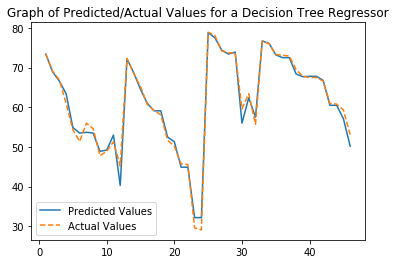

In [64]:
#plot a graph
x=np.linspace(1, 46, 46)

fig,ax = plt.subplots()
ax.plot(x, predicted_labels, '-', label='Predicted Values')
ax.plot(x, actual_labels, '--',label='Actual Values');
plt.title('Graph of Predicted/Actual Values for a Decision Tree Regressor')

leg = ax.legend();

R-Squared:  0.5596298444071508


Text(0.5, 1.0, 'Graph of Predicted/Actual Values for a Linear Regressor')

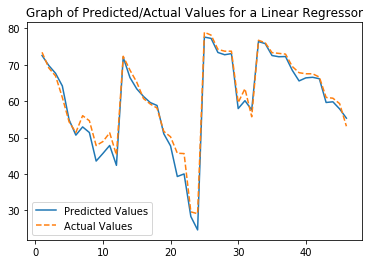

In [65]:
#Lets look at a Linear Regressor
from sklearn.linear_model import LinearRegression

regressor_2=LinearRegression()
regressor_2=regressor_2.fit(train_dataset,train_labels)

regressor_2_score=regressor_2.score(test_dataset,test_labels)

print('R-Squared: ',regressor_2_score)

#get predicted values for Validaton data and plot a graph 

predicted_labels=regressor_2.predict(validation_dataset)
actual_labels=np.array(validation_labels)

fig,ax = plt.subplots()
ax.plot(x, predicted_labels, '-', label='Predicted Values')
ax.plot(x, actual_labels, '--',label='Actual Values');
leg = ax.legend();
plt.title('Graph of Predicted/Actual Values for a Linear Regressor')

R-Squared:  0.5337587781848271


Text(0.5, 1.0, 'Graph of Predicted/Actual Values for a KNN Regressor')

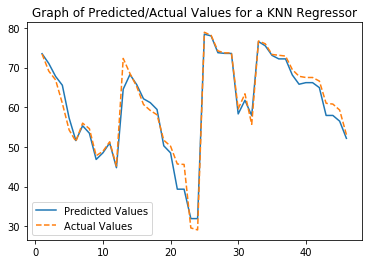

In [66]:
#Lets try on more, KNN Regressor
from sklearn.neighbors import KNeighborsRegressor


regressor_3=KNeighborsRegressor(n_neighbors=8)
regressor_3=regressor_3.fit(train_dataset,train_labels)

regressor_3_score=regressor_3.score(test_dataset,test_labels)

print('R-Squared: ',regressor_3_score)

#get predicted values for Validaton data and plot a graph 

predicted_labels=regressor_3.predict(validation_dataset)
actual_labels=np.array(validation_labels)

fig,ax = plt.subplots()
ax.plot(x, predicted_labels, '-', label='Predicted Values')
ax.plot(x, actual_labels, '--',label='Actual Values');
leg = ax.legend();
plt.title('Graph of Predicted/Actual Values for a KNN Regressor')

## 3. Improve our Results
Looking at the three Models above, we can see by looking at the 'R-Squared Score' & 'Visualized Graph' that the Decision Tree performed better than the other Regressors in predicting. I would be stopping at this point for now. However, we can go further to try and get a better performing model(either by adusting some parameters or even better trying other Machine learning Algorithms).

## 4. Present the Results
Since we have choosen the model we wish to use for predicton, we can save it and call it whenever we want to run a prediction.
Remember that anytime you want to make predictions on the saved model, you need to process the input data and pass it in a similar structure as we did in the training process.

So its time to save the model.

In [69]:
from sklearn.externals import joblib
joblib.dump(regressor_1,'ld_model.pkl') # save the first model in a location on your Drive

['ld_model.pkl']

Feel free to Fork this notebook and recommend a better approach to solving this or improving this code. 

You can contact me via samtheo1597@gmail.com